### Import Required Libraries

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings("ignore")

### LinearRegression Class

In [202]:
class LinearRegression:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def __linear(self,x):
        return np.dot(x,self.w.T)+self.b
    
    def __compute_grads(self,x,y):
        yhat = self.__linear(x)
        grad_w = (-(y-yhat) * x)
        grad_b = -(y-yhat)
        return grad_w, grad_b
    
    
    def train(self, X, Y, epochs=1, eta=0.01, weights_init=True, verbose=0):
        # dict to hold loss per iteration
        loss_dt = {}
        
        if weights_init:
            # initialize w and b
            self.w = np.random.randn(1,X.shape[1])
            print('initial wts: ',self.w)
            self.b = 0
            
        
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dw = 0 
            db = 0 
            for x, y in zip(X,Y):
                grad_w, grad_b = self.__compute_grads(x,y)
                dw = dw + grad_w
                db = db + grad_b
            
            # Total number of training points
            m = X.shape[0] 
            
            # update the weights and bias
            self.w = self.w - (eta * (dw/m))
            self.b = self.b - (eta * (db/m))
            
            # compute the loss and put it in dict
            yhat = self.__linear(X)
            loss_dt[i] = mean_squared_error(yhat,Y)
             
              
        if verbose:
            plt.plot(loss_dt.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
            
    def predict(self,X):
        y_pred = []
        for x in X:
            y_pred.append(self.__linear(x))
        return y_pred
    

### Load boston dataset from sklearn datasets

In [203]:
source = load_boston()
data = source['data']
label = source['target']
features = source['feature_names']
print('Shape of X: ',data.shape)
print('Shape of Y: ',label.shape)

Shape of X:  (506, 13)
Shape of Y:  (506,)


### Split data into train and test

In [204]:
X_train,X_test,y_train,y_test = train_test_split(data, label, test_size=0.2, random_state=42)
print('Shape of X_train:{} and y_train:{}'.format(X_train.shape,y_train.shape))
print('Shape of X_test:{} and y_test:{}'.format(X_test.shape,y_test.shape))

Shape of X_train:(404, 13) and y_train:(404,)
Shape of X_test:(102, 13) and y_test:(102,)


### Standardization of Data using StandardScalar

In [205]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
print('Shape After Standardization')
print('Shape of X_train:{} and y_train:{}'.format(X_train.shape,y_train.shape))
print('Shape of X_test:{} and y_test:{}'.format(X_test.shape,y_test.shape))

Shape After Standardization
Shape of X_train:(404, 13) and y_train:(404,)
Shape of X_test:(102, 13) and y_test:(102,)


### Train the model

initial wts:  [[ 0.87444122 -0.40711363  0.12097907 -1.52114973  0.07861262 -1.31581561
   0.54672153 -2.01273205  0.75614118 -1.0683436  -1.2753016   2.06937318
  -0.21134192]]


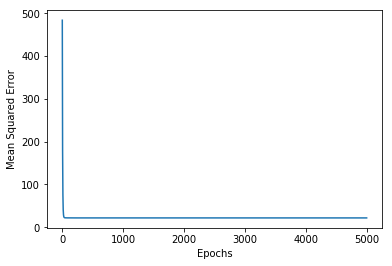

In [242]:
lr = LinearRegression()
model.train(X_train,y_train,epochs=5000,eta=0.1,verbose=1)

### Use the trained model to predict on train and test

In [243]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Calculate RMSE on train and test

In [255]:
print('train rmse: ',mean_squared_error(y_train,y_train_pred,squared=False))
print('test rmse: ',mean_squared_error(y_test,y_test_pred,squared=False))

train rmse:  4.6520331848801675
test rmse:  4.928602182665341
